# Install libs

In [ ]:
pip install myst_nb

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import math
from myst_nb import glue
from statistics import NormalDist

# Reading the CSV folder

In [ ]:
folder_path = "/content/drive/MyDrive/Papers - Mestrado Cristofer/Cristofer-Tópicos Avançados em Sistemas/Programas/all_results"

# Combine all CSVs into a single DataFrame

In [ ]:
all_files = glob.glob(os.path.join(folder_path, "*.csv"))
combined_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# Checking dataframe

In [ ]:
combined_df.head()

,h,model,metric,similarity
0,h1,openai,bert_metric,0.988780
1,h1,llama,bert_metric,0.987299
2,h1,openai,bert_metric,1.000000
3,h1,llama,bert_metric,0.994812
4,h1,openai,bert_metric,0.993168


In [ ]:
len(combined_df)

780

In [ ]:
len(combined_df.where(combined_df['h'] != 'h0').dropna(how='all'))

720

# Split data in openai_df and llama_df

In [ ]:
openai_df = combined_df.where(combined_df['model'].str.contains('openai')).dropna(how='all')
llama_df = combined_df.where(combined_df['model'].str.contains('llama')).dropna(how='all')

# Modify the value (h1..hk) to 's' because we work with scenarios not hypotheses intead. And rename column

In [ ]:
openai_df['h'] = openai_df['h'].str.replace('h', 's')
llama_df['h'] = llama_df['h'].str.replace('h', 's')
openai_df.rename(columns={'h':'s'}, inplace=True)
llama_df.rename(columns={'h':'s'}, inplace=True)

# Checking dataframe created

In [ ]:
openai_df.head()

,s,model,metric,similarity
0,s1,openai,bert_metric,0.988780
2,s1,openai,bert_metric,1.000000
4,s1,openai,bert_metric,0.993168
6,s1,openai,bert_metric,0.994419
8,s1,openai,bert_metric,0.951476


In [ ]:
llama_df.head()

,s,model,metric,similarity
1,s1,llama,bert_metric,0.987299
3,s1,llama,bert_metric,0.994812
5,s1,llama,bert_metric,0.983034
7,s1,llama,bert_metric,0.970857
9,s1,llama,bert_metric,0.971525


# Getting overall the mean and standard deviation

In [ ]:
openai_df_all_mean = openai_df['similarity'].mean()
openai_df_all_std = openai_df['similarity'].std()
llama_df_all_mean = llama_df['similarity'].mean()
llama_df_all_std = llama_df['similarity'].std()
openai_df_all_length = len(openai_df)
llama_df_all_length = len(llama_df)
print(f"OpenAI all scenarios mean: {openai_df_all_mean}")
print(f"OpenAI all scenarios std: {openai_df_all_std}")
print(f"Llama all scenarios mean: {llama_df_all_mean}")
print(f"Llama all scenarios std: {llama_df_all_std}")
print(f"OpenAI all scenarios len: {openai_df_all_length}")
print(f"Llama all scenarios len: {llama_df_all_length}")

OpenAI all scenarios mean: 0.9684053543262956
OpenAI all scenarios std: 0.020385881253579805
Llama all scenarios mean: 0.9649938265550888
Llama all scenarios std: 0.024474332011384884
OpenAI all scenarios len: 390
Llama all scenarios len: 390


# Getting the mean and standard deviation from each scenario

In [ ]:
columns_list = ['s','model','metric']
openai_df_mean = openai_df.groupby(columns_list).mean()
openai_df_std = openai_df.groupby(columns_list).std()
openai_df_length = openai_df.groupby(columns_list).size()

llama_df_mean = llama_df.groupby(columns_list).mean()
llama_df_std = llama_df.groupby(columns_list).std()
llama_df_length = llama_df.groupby(columns_list).size()

# Reset index before dropping columns

In [ ]:
openai_df_mean = openai_df_mean.reset_index()
openai_df_std = openai_df_std.reset_index()
llama_df_mean = llama_df_mean.reset_index()
llama_df_std = llama_df_std.reset_index()

# Dropping columns model and metric

In [ ]:
columns_list = ['model','metric']
openai_df_mean.drop(columns=columns_list, inplace=True)
openai_df_std.drop(columns=columns_list, inplace=True)
openai_df.drop(columns=columns_list, inplace=True)
llama_df_mean.drop(columns=columns_list, inplace=True)
llama_df_std.drop(columns=columns_list, inplace=True)
llama_df.drop(columns=columns_list, inplace=True)

# Analyzing All Scenarios (0..12) of OpenAI

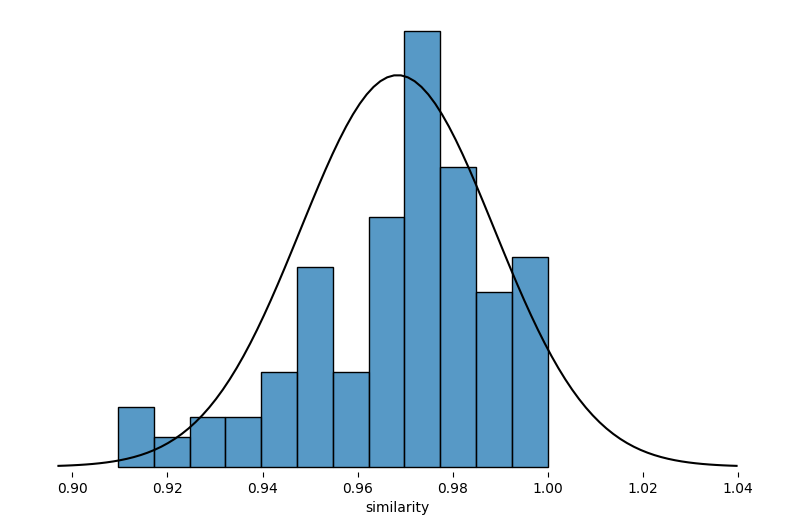

In [ ]:
mu = openai_df_all_mean
sigma = openai_df_all_std
x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Scale down the y-values of the lineplot
y_scaled = y * 4  # Adjust scaling factor as needed

fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figsize
ax1 = sns.histplot(openai_df['similarity'].where(openai_df['s'].str.contains('s')).dropna(how='all'))

ax2 = sns.lineplot(x=x,y=y_scaled, color='black')

plt.ylim(bottom=-1)
plt.xlim([mu - 4*sigma, mu + 4*sigma])  # Adjust xlim

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.close()

glue("zeppo-fig", fig, display=True)

# Analyzing All Scenarios (0..12) of Llama

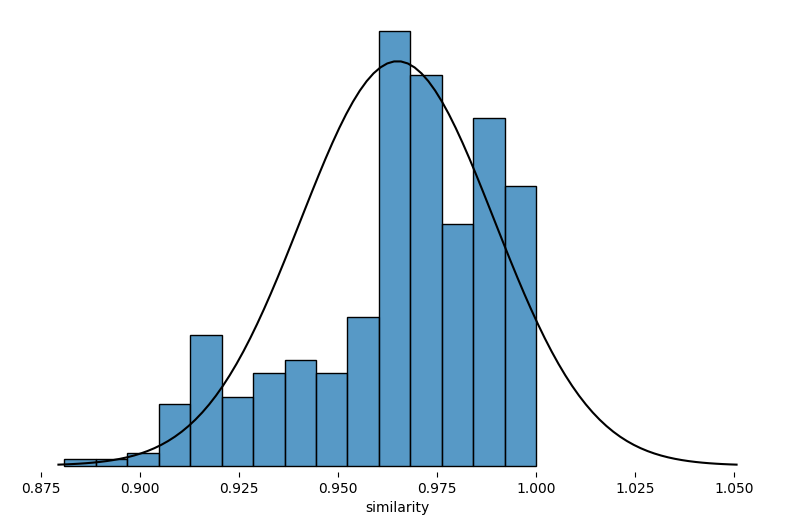

In [ ]:
mu = llama_df_all_mean
sigma = llama_df_all_std
x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Scale down the y-values of the lineplot
y_scaled = y * 4  # Adjust scaling factor as needed

fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figsize
ax1 = sns.histplot(llama_df['similarity'].where(llama_df['s'].str.contains('s')).dropna(how='all'))

ax2 = sns.lineplot(x=x,y=y_scaled, color='black')

plt.ylim(bottom=-1)
plt.xlim([mu - 4*sigma, mu + 4*sigma])  # Adjust xlim

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.close()

glue("zeppo-fig", fig, display=True)

# Shapiro-Wilk checking all scenarios (0..12)

In [ ]:
shapiro_openai, p_value_openai = stats.shapiro(openai_df['similarity'].where(openai_df['s'].str.contains('s')).dropna(how='all'))
shapiro_llama, p_value_llama = stats.shapiro(llama_df['similarity'].where(llama_df['s'].str.contains('s')).dropna(how='all'))

In [ ]:
print(f"Shapiro-Wilk test for OpenAI: Statistic={shapiro_openai}, p-value={p_value_openai}")
print(f"Shapiro-Wilk test for Llama: Statistic={shapiro_llama}, p-value={p_value_llama}")

Shapiro-Wilk test for OpenAI: Statistic=0.9394214458926995, p-value=1.6317675045593743e-11
Shapiro-Wilk test for Llama: Statistic=0.9310339766036464, p-value=1.9281503621138604e-12


# ***It was observed p-value from OpenAI and Llama are not normally distributed.***

## Utilizing Kolmogorov-Smirnov Test

In [ ]:
s_mean_openai = openai_df_mean.similarity.values[0]
s_std_openai = openai_df_std.similarity.values[0]
ks_openai, ks_p_openai = stats.kstest(openai_df.similarity, 'norm', args=(s_mean_openai, s_std_openai))
print(f"K-S Statistic for OpenAI: Statistic={ks_openai}, p-value={ks_p_openai}")

K-S Statistic for OpenAI: Statistic=0.3586629419515835, p-value=2.0118402201064738e-45


In [ ]:
s_mean_llama = llama_df_mean.similarity.values[0]
s_std_llama = llama_df_std.similarity.values[0]
ks_llama, ks_p_llama = stats.kstest(llama_df.similarity, 'norm', args=(s_mean_llama, s_std_llama))
print(f"K-S Statistic for Llama: Statistic={ks_llama}, p-value={ks_p_llama}")

K-S Statistic for Llama: Statistic=0.14983246401718317, p-value=4.154231414044244e-08


# Right now, I am going to evaluate each scenario checking if th Scenario 0  can be likely Hypothesis null

# S0 scenario to OpenAI

In [ ]:
shapiro_openai_s0, p_value_openai_s0 = stats.shapiro(openai_df['similarity'].where(openai_df['s'].str.contains('s0')).dropna(how='all'))
print(f"Shapiro-Wilk test for OpenAI: Statistic={shapiro_openai_s0}, p-value={p_value_openai_s0}")

Shapiro-Wilk test for OpenAI: Statistic=0.9454475431907869, p-value=0.1275465155259069


# Using Q-QPLOT to see the data are normally distributed from S0

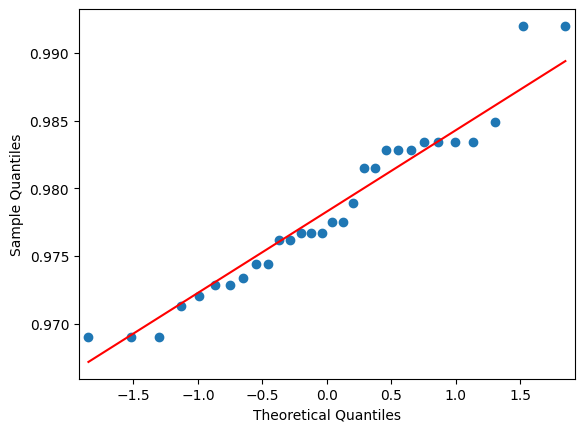

In [ ]:
sm.qqplot(openai_df['similarity'].where(openai_df['s'].str.contains('s0')).dropna(how='all'), line='s')
plt.show()

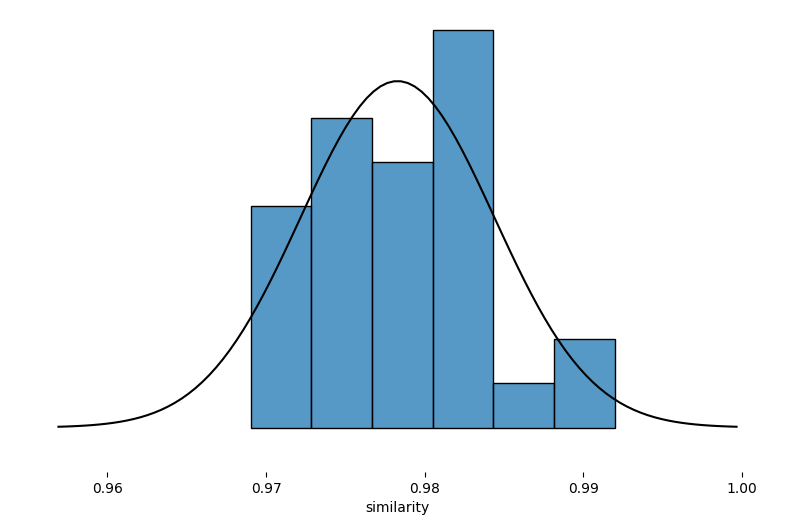

In [ ]:
mu = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s0')).dropna(how='all').values[0]
sigma = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s0')).dropna(how='all').values[0]
x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Scale down the y-values of the lineplot
y_scaled = y * 0.12  # Adjust scaling factor as needed

fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figsize
ax1 = sns.histplot(openai_df['similarity'].where(openai_df['s'].str.contains('s0')).dropna(how='all'))

ax2 = sns.lineplot(x=x,y=y_scaled, color='black')

plt.ylim(bottom=-1)
plt.xlim([mu - 4*sigma, mu + 4*sigma])  # Adjust xlim

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.close()

glue("zeppo-fig", fig, display=True)

# Applying Anderson-Darling Test knowing that:
## H null = my data are normality
## Using the Scenario 0 (s0)

---

In [ ]:
result = stats.anderson(openai_df['similarity'].where(openai_df['s'].str.contains('s0')).dropna(how='all'))
print(f"AD Statistic: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Levels: {result.significance_level}")

AD Statistic: 0.5070333964705469
Critical Values: [0.521 0.593 0.712 0.83  0.988]
Significance Levels: [15.  10.   5.   2.5  1. ]


Output Interpretation
AD Statistic (A²): The test statistic (larger = stronger evidence against normality).

Critical Values: Thresholds at different significance levels (15%, 10%, 5%, 2.5%, 1%).

Significance Levels: Corresponding alpha levels (0.15, 0.10, 0.05, 0.025, 0.01).

Decision Rule (Modified for Your H₀)
Compare A² against critical values.

If A² > critical value at (e.g., 5%) → Reject H₁ (data is not normal).

If A² ≤ critical value → Fail to reject H₀ (data may not be normal).

(Normally, A² > critical value → reject normality. Here, we’re flipping the logic to fit your H₀.)

# Applying Kolmogorov-Smirnov (KS) Test knowing that:
## H null = my data are normality
## Using the Scenario 0 (s0)
---


In [ ]:
s0_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s0')).dropna(how='all').values[0]
s0_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s0')).dropna(how='all').values[0]

In [ ]:
ks_openai_s0, ks_p_openai_s0 = stats.kstest(openai_df['similarity'].where(openai_df['s'].str.contains('s0')).dropna(how='all'), 'norm', args=(s0_mean, s0_std))
print(f"K-S Statistic for OpenAI: Statistic={ks_openai_s0}, p-value={ks_p_openai_s0}")

K-S Statistic for OpenAI: Statistic=0.11887370376269579, p-value=0.7463707846602057


# Applying Jarque-Bera Test knowing that:
## H null = my data are normality
## Using the Scenario 0 (s0)
---

In [ ]:
jb_openai_s0, jb_p_openai_s0 = stats.jarque_bera(openai_df['similarity'].where(openai_df['s'].str.contains('s0')).dropna(how='all'))
print(f"JB Statistic for OpenAI: Statistic={jb_openai_s0}, p-value={jb_p_openai_s0}")

JB Statistic for OpenAI: Statistic=1.0174979972525822, p-value=0.6012472696913941


# If we uses as Hypothesis null: The data are normally distributed. We have as result:

1.   Shapiro-Wilk (SW) test:
*   Interpretation: Since p > 0.05, we fail to reject H null
*   Conclusion: The data does not significantly deviate from normality
2.   Anderson-Darling (AD) test:
*   Compare the AD Stats to the Critical value (CV)
*   AD > CV at a given significance level, reject normality at that level
*   0.50 < 0.521 (15%) -> Fail to reject H null at all significance levels
*   Conclusion: No evidence against normality
3.   Kolmogorov-Smirnov (KS) test:
*   Interpretation: Since p > 0.05, we fail to reject H null
*   Conclusion: The data is consistent with a normal distribution.
4.   Jarque-Bera (JB) test:
*   Interpretation: Since p > 0.05, we fail to reject H null
*   Conclusion: The data does not show significant skewness or excess kurtosis (supports normality).


# Final Summary Table

Test	            |Statistic|	p-value / Critical Value	|Conclusion
------------------|---------|---------------------------|----------
Shapiro-Wilk	    |  0.954	|    p = 0.127 (> 0.05)	    |✅ Normal
Anderson-Darling  |	 0.507	|    < 0.521 (15% CV)	      |✅ Normal
Kolmogorov-Smirnov|	 0.118	|    p = 0.746 (> 0.05)	    |✅ Normal
Jarque-Bera	      |  1.017	|    p = 0.601 (> 0.05)	    |✅ Normal


# Right, we can proceed with t-tests in pairs.
# With prior that my Hypothesis alternative saying my others scenarios are not normal

In [ ]:
df_s0_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s0')).dropna(how='all')
s0_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s0')).dropna(how='all').values[0]
s0_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s0')).dropna(how='all').values[0]

df_s1_openai = openai_df['similarity'].where(openai_df['s'] == 's1').dropna(how='all')
s1_mean = openai_df_mean.similarity.where(openai_df_mean['s'] == 's1').dropna(how='all').values[0]
s1_std = openai_df_std.similarity.where(openai_df_std['s'] == 's1').dropna(how='all').values[0]

df_s2_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s2')).dropna(how='all')
s2_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s2')).dropna(how='all').values[0]
s2_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s2')).dropna(how='all').values[0]

df_s3_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s3')).dropna(how='all')
s3_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s3')).dropna(how='all').values[0]
s3_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s3')).dropna(how='all').values[0]

df_s4_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s4')).dropna(how='all')
s4_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s4')).dropna(how='all').values[0]
s4_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s4')).dropna(how='all').values[0]

df_s5_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s5')).dropna(how='all')
s5_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s5')).dropna(how='all').values[0]
s5_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s5')).dropna(how='all').values[0]

df_s6_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s6')).dropna(how='all')
s6_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s6')).dropna(how='all').values[0]
s6_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s6')).dropna(how='all').values[0]

df_s7_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s7')).dropna(how='all')
s7_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s7')).dropna(how='all').values[0]
s7_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s7')).dropna(how='all').values[0]

df_s8_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s8')).dropna(how='all')
s8_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s8')).dropna(how='all').values[0]
s8_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s8')).dropna(how='all').values[0]

df_s9_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s9')).dropna(how='all')
s9_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s9')).dropna(how='all').values[0]
s9_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s9')).dropna(how='all').values[0]

df_s10_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s10')).dropna(how='all')
s10_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s10')).dropna(how='all').values[0]
s10_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s10')).dropna(how='all').values[0]

df_s11_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s11')).dropna(how='all')
s11_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s11')).dropna(how='all').values[0]
s11_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s11')).dropna(how='all').values[0]

df_s12_openai = openai_df['similarity'].where(openai_df['s'].str.contains('s12')).dropna(how='all')
s12_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains('s12')).dropna(how='all').values[0]
s12_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains('s12')).dropna(how='all').values[0]

# Perform One-Sample T-Test S0 and S1

In [ ]:
result_ttest = stats.ttest_ind(df_s0_openai, df_s1_openai)
print(f"T-Test Statistic: {result_ttest.statistic}")
print(f"p-value: {result_ttest.pvalue}")
print(f"degrees of freedom: {result_ttest.df}")

T-Test Statistic: -1.948291867611481
p-value: 0.05622409474618722
degrees of freedom: 58.0


Understand the result:
*   T-Test Statistic = -1.948291867611481
      
      The negative sign indicates S1’s mean is lower than S0’s mean.
      The magnitude (1.948) suggests the difference is 1.95 standard errors away from S0.

*   P-Value = 0.05622409474618722
      
      Considering p <= 0.05 reject H0 and p > 0.05 fail to reject H0.
      My conclusion is these scenarios are very close significantly

*   Degree of Freedom (DF) = 145

      Larger df = More reliable t-distribution (closer to normal).

# Calculate the Cohen's d to check how large the difference is between S0 and S1:

In [ ]:
pooled_std = np.sqrt(((len(df_s0_openai)-1*(s0_std**2) + (len(df_s1_openai)-1*(s1_std**2))) / (len(df_s0_openai) + len(df_s1_openai) - 2)))
cohen_d = s1_mean - s0_mean / pooled_std
print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.02296034902086941


# It means the standard deviation between them is Small.
# Following this perspectiive:
* Small: d < 0.20.
* Medium: 0.20 < d < 0.80.
* Large: d > 0.80


# S1 scenario to OpenAI

In [ ]:
shapiro_openai_s1, p_value_openai_s1 = stats.shapiro(openai_df['similarity'].where(openai_df['s'] == 's1').dropna(how='all'))
print(f"Shapiro-Wilk test for OpenAI: Statistic={shapiro_openai_s1}, p-value={p_value_openai_s1}")

Shapiro-Wilk test for OpenAI: Statistic=0.660424203040856, p-value=4.350443867784307e-07


# Using Q-QPLOT to see the data are not normally distributed from S1

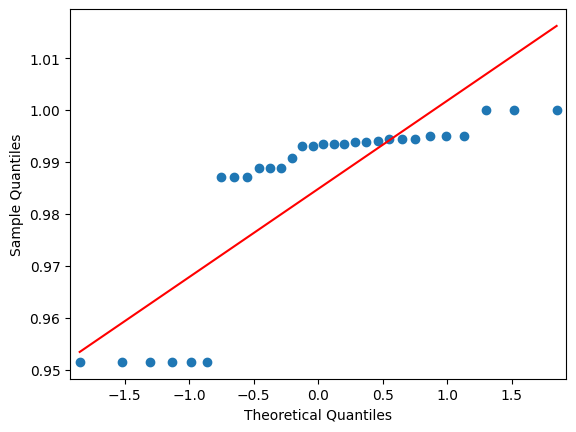

In [ ]:
sm.qqplot(openai_df['similarity'].where(openai_df['s'] == 's1').dropna(how='all'), line='s')
plt.show()

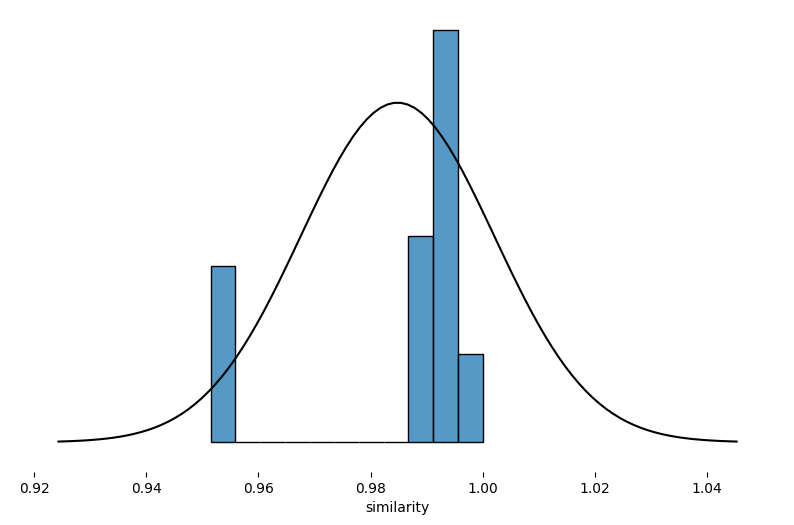

In [ ]:
mu = openai_df_mean.similarity.where(openai_df_mean['s'] == 's1').dropna(how='all').values[0]
sigma = openai_df_std.similarity.where(openai_df_std['s'] == 's1').dropna(how='all').values[0]
x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Scale down the y-values of the lineplot
y_scaled = y * 0.5  # Adjust scaling factor as needed

fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figsize
ax1 = sns.histplot(openai_df['similarity'].where(openai_df['s'] == 's1').dropna(how='all'))

ax2 = sns.lineplot(x=x,y=y_scaled, color='black')

plt.ylim(bottom=-1)
plt.xlim([mu - 4*sigma, mu + 4*sigma])  # Adjust xlim

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.close()

glue("zeppo-fig", fig, display=True)

# Doing a loop to run all scenarios and perform evaluation to each scenario

In [ ]:
list_scenarios = [df_s1_openai, df_s2_openai, df_s3_openai, df_s4_openai, df_s5_openai, df_s6_openai, df_s7_openai, df_s8_openai, df_s9_openai, df_s10_openai, df_s11_openai, df_s12_openai]
for i, scenario in enumerate(list_scenarios):
  result_ttest = stats.ttest_ind(df_s0_openai, scenario)
  sc = i + 1
  print(f"Scenario {sc} vs Baseline (S0) Using T-Test")
  print(f"Scenario {sc} T-Test Statistic: {result_ttest.statistic}")
  print(f"Scenario {sc} p-value: {result_ttest.pvalue}")
  print(f"Scenario {sc} degrees of freedom: {result_ttest.df}")
  print("-----------------------------------------")
  print(f"Due to non-normal data Scenario {sc}")
  wc_openai, wc_p_openai = stats.wilcoxon(df_s0_openai, scenario)
  print(f"Wilcoxon : {wc_openai}, p-value: {wc_p_openai}")
  print("-----------------------------------------")
  print(f"Statistic Data of Scenario {sc}")
  print(f"Shapiro-Wilk test for Scenario {sc}")
  shapiro_openai_sc, p_value_openai_sc = stats.shapiro(scenario)
  print(f"Shapiro-Wilk test for OpenAI: Statistic={shapiro_openai_sc}, p-value={p_value_openai_sc}")
  print(" ")
  print(f"Anderson-Darling Stats of Scenario {sc}")
  result = stats.anderson(scenario)
  print(f"AD Statistic: {result.statistic}")
  print(f"Critical Values: {result.critical_values}")
  print(f"Significance Levels: {result.significance_level}")
  print(" ")
  print(f"Kolmogorov-Smirnov of Scenario {sc}")
  sc_mean = openai_df_mean.similarity.where(openai_df_mean['s'].str.contains(f's{sc}')).dropna(how='all').values[0]
  sc_std = openai_df_std.similarity.where(openai_df_std['s'].str.contains(f's{sc}')).dropna(how='all').values[0]
  ks_openai_sc, ks_p_openai_sc = stats.kstest(scenario, 'norm', args=(sc_mean, sc_std))
  print(f"K-S Statistic for OpenAI: Statistic={ks_openai_sc}, p-value={ks_p_openai_sc}")
  print(" ")
  print(f"Jarque-Bera of Scenario {sc}")
  jb_openai_sc, jb_p_openai_sc = stats.jarque_bera(scenario)
  print(f"J-B Statistic for OpenAI: Statistic={jb_openai_sc}, p-value={jb_p_openai_sc}")
  print("-----------------------------------------")

Scenario 1 vs Baseline (S0) Using T-Test
Scenario 1 T-Test Statistic: -1.948291867611481
Scenario 1 p-value: 0.05622409474618722
Scenario 1 degrees of freedom: 58.0
-----------------------------------------
Due to non-normal data Scenario 1
Wilcoxon : 145.0, p-value: 0.07324407435953617
-----------------------------------------
Statistic Data of Scenario 1
Shapiro-Wilk test for Scenario 1
Shapiro-Wilk test for OpenAI: Statistic=0.660424203040856, p-value=4.350443867784307e-07
 
Anderson-Darling Stats of Scenario 1
AD Statistic: 4.692565404213816
Critical Values: [0.521 0.593 0.712 0.83  0.988]
Significance Levels: [15.  10.   5.   2.5  1. ]
 
Kolmogorov-Smirnov of Scenario 1
K-S Statistic for OpenAI: Statistic=0.3545688823258995, p-value=0.0007024235266660517
 
Jarque-Bera of Scenario 1
J-B Statistic for OpenAI: Statistic=9.241818649726236, p-value=0.009843840741022302
-----------------------------------------
Scenario 2 vs Baseline (S0) Using T-Test
Scenario 2 T-Test Statistic: -0.834

# Evaluate to Llama results

In [ ]:
df_s0_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s0')).dropna(how='all')
s0_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s0')).dropna(how='all').values[0]
s0_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s0')).dropna(how='all').values[0]

df_s1_llama = llama_df['similarity'].where(llama_df['s'] == 's1').dropna(how='all')
s1_mean = llama_df_mean.similarity.where(llama_df_mean['s'] == 's1').dropna(how='all').values[0]
s1_std = llama_df_std.similarity.where(llama_df_std['s'] == 's1').dropna(how='all').values[0]

df_s2_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s2')).dropna(how='all')
s2_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s2')).dropna(how='all').values[0]
s2_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s2')).dropna(how='all').values[0]

df_s3_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s3')).dropna(how='all')
s3_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s3')).dropna(how='all').values[0]
s3_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s3')).dropna(how='all').values[0]

df_s4_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s4')).dropna(how='all')
s4_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s4')).dropna(how='all').values[0]
s4_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s4')).dropna(how='all').values[0]

df_s5_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s5')).dropna(how='all')
s5_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s5')).dropna(how='all').values[0]
s5_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s5')).dropna(how='all').values[0]

df_s6_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s6')).dropna(how='all')
s6_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s6')).dropna(how='all').values[0]
s6_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s6')).dropna(how='all').values[0]

df_s7_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s7')).dropna(how='all')
s7_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s7')).dropna(how='all').values[0]
s7_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s7')).dropna(how='all').values[0]

df_s8_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s8')).dropna(how='all')
s8_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s8')).dropna(how='all').values[0]
s8_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s8')).dropna(how='all').values[0]

df_s9_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s9')).dropna(how='all')
s9_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s9')).dropna(how='all').values[0]
s9_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s9')).dropna(how='all').values[0]

df_s10_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s10')).dropna(how='all')
s10_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s10')).dropna(how='all').values[0]
s10_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s10')).dropna(how='all').values[0]

df_s11_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s11')).dropna(how='all')
s11_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s11')).dropna(how='all').values[0]
s11_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s11')).dropna(how='all').values[0]

df_s12_llama = llama_df['similarity'].where(llama_df['s'].str.contains('s12')).dropna(how='all')
s12_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains('s12')).dropna(how='all').values[0]
s12_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains('s12')).dropna(how='all').values[0]

# S0 scenario to Llama

In [ ]:
shapiro_llama_s0, p_value_llama_s0 = stats.shapiro(df_s0_llama)
print(f"Shapiro-Wilk test for Llama: Statistic={shapiro_llama_s0}, p-value={p_value_llama_s0}")

Shapiro-Wilk test for Llama: Statistic=0.8625173000376143, p-value=0.0011467742445571867


# Applying the Anderson-Darling Test knowing that:
## H null = my data are non-normality
## Using the Scenario 0 (s0)

In [ ]:
result = stats.anderson(df_s0_llama)
print(f"AD Statistic: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Levels: {result.significance_level}")

AD Statistic: 1.1071467657077
Critical Values: [0.521 0.593 0.712 0.83  0.988]
Significance Levels: [15.  10.   5.   2.5  1. ]


Output Interpretation
AD Statistic (A²): The test statistic (larger = stronger evidence against normality).

Critical Values: Thresholds at different significance levels (15%, 10%, 5%, 2.5%, 1%).

Significance Levels: Corresponding alpha levels (0.15, 0.10, 0.05, 0.025, 0.01).

Decision Rule (Modified for Your H₀)
Compare A² against critical values.

If A² > critical value at (e.g., 5%) → Reject H₁ (data is not normal).

If A² ≤ critical value → Fail to reject H₀ (data may not be normal).

(Normally, A² > critical value → reject normality. Here, we’re flipping the logic to fit your H₀.)

# Applying Kolmogorov-Smirnov (KS) Test knowing that:
## H null = my data are normality
## Using the Scenario 0 (s0)
---


In [ ]:
ks_llama_s0, ks_p_llama_s0 = stats.kstest(df_s0_llama, 'norm', args=(s0_mean, s0_std))
print(f"K-S Statistic for Llama: Statistic={ks_llama_s0}, p-value={ks_p_llama_s0}")

K-S Statistic for Llama: Statistic=0.14221445730493454, p-value=0.5322174009049836


# Applying Jarque-Bera Test knowing that:
## H null = my data are non-normality
## Using the Scenario 0 (s0)
---

In [ ]:
jb_llama_s0, jb_p_llama_s0 = stats.jarque_bera(df_s0_llama)
print(f"JB Statistic for Llama: Statistic={jb_llama_s0}, p-value={jb_p_llama_s0}")

JB Statistic for Llama: Statistic=17.053936343217856, p-value=0.00019805452792778287


# If we uses as Hypothesis null: The data are not normally distributed. We have as result:

1.   Shapiro-Wilk (SW) test:
*   Interpretation: Since p < 0.05, we reject the reject H null
*   Conclusion: The data deviate significantly from normal distribution.
2.   Anderson-Darling (AD) test:
*   Compare the AD Stats to the Critical value (CV)
*   AD > CV at a given significance level, reject normality at that level
*   1.107 > 0.980 (1%) -> Reject H null at 1% significance levels
*   Conclusion: Strong evidence of non-normality
3.   Kolmogorov-Smirnov (KS) test:
*   Interpretation: Since p > 0.05, we fail to reject H null
*   Conclusion: The data is consistent with a normal distribution. KS is less sensitive than SW.
4.   Jarque-Bera (JB) test:
*   Interpretation: Since p < 0.05, we reject H null
*   Conclusion: The data has shown significant skewness or excess kurtosis (non-normal).


# Final Summary Table

Test	            |Statistic|	p-value / Critical Value	|Conclusion
------------------|---------|---------------------------|----------
Shapiro-Wilk	    |  0.862	|   p = 0.001 (< 0.05)	    |❌ Not Normal
Anderson-Darling	|  1.107	|   > 0.980 (1% CV)	        |❌ Not Normal
Kolmogorov-Smirnov|	 0.142	|   p = 0.532 (> 0.05)	    |⚠️ Normal*
Jarque-Bera	      |  17.054	|   p = 0.00019 (< 0.05)	  |❌ Not Normal


# As scenario 0 or baseline is not normal
# I'm going to use two alternatives stats
# Mann-Whitney U test and Wilcoxon signed-rank test

In [ ]:
mw_llama_s0, mw_p_llama_s0 = stats.mannwhitneyu(df_s0_llama, df_s1_llama)
print(f"Mann-Whitney U: {mw_llama_s0}, p-value: {mw_llama_s0}")

wc_llama_s0, wc_p_llama_s0 = stats.wilcoxon(df_s0_llama, df_s1_llama)
print(f"Wilcoxon : {wc_llama_s0}, p-value: {wc_p_llama_s0}")

Mann-Whitney U: 280.0, p-value: 280.0
Wilcoxon : 133.0, p-value: 0.04048972204327583


### Evaluating the Mann-Whitney U stat we can understand that is inconclusive
### But the Wilcoxon signed-rank test the paired groups differ significantly
### p < 0.05 → Reject H₀ (significant difference between paired groups).
### Effect Direction: Negative ranks (e.g., "S1 < S0") dominate if the statistic is small.

# Perform One-Sample T-Test S0 and S1

In [ ]:
pooled_std = np.sqrt(((len(df_s0_llama)-1*(s0_std**2) + (len(df_s1_llama)-1*(s1_std**2))) / (len(df_s0_llama) + len(df_s1_llama) - 2)))
cohen_d = s1_mean - s0_mean / pooled_std
print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.025019788109142627


# Using Q-QPLOT to see the data are normally distributed from S0

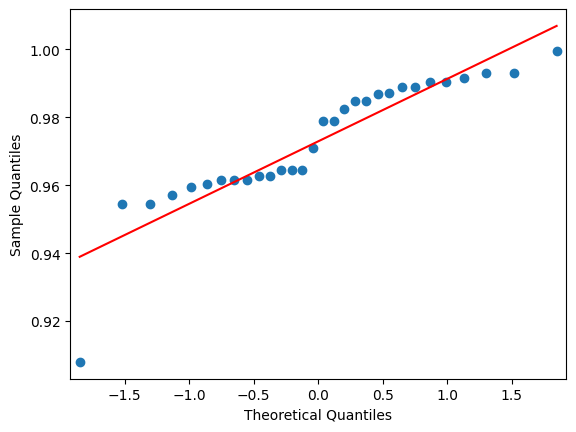

In [ ]:
sm.qqplot(df_s0_llama, line='s')
plt.show()

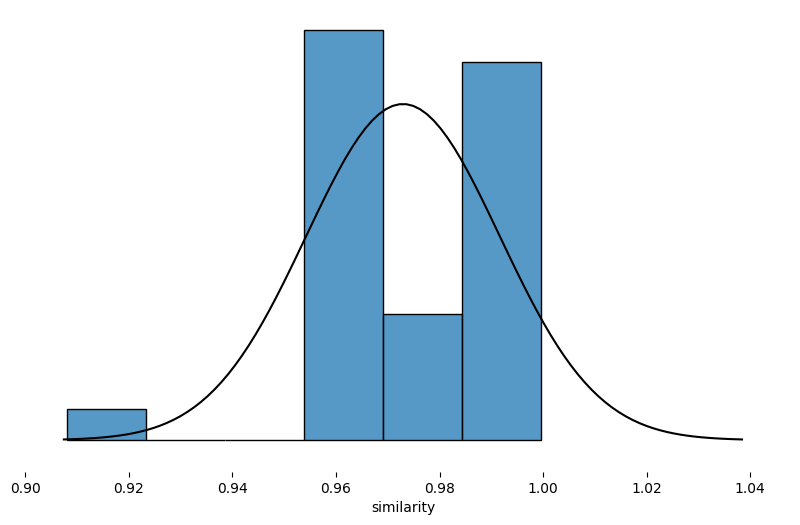

In [ ]:
mu = s0_mean
sigma = s0_std
x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Scale down the y-values of the lineplot
y_scaled = y * 0.5  # Adjust scaling factor as needed

fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figsize
ax1 = sns.histplot(df_s0_llama)

ax2 = sns.lineplot(x=x,y=y_scaled, color='black')

plt.ylim(bottom=-1)
plt.xlim([mu - 4*sigma, mu + 4*sigma])  # Adjust xlim

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.close()

glue("zeppo-fig", fig, display=True)

# Doing a loop to run all scenarios and perform evaluation to each scenario

In [ ]:
list_scenarios = [df_s1_llama, df_s2_llama, df_s3_llama, df_s4_llama, df_s5_llama, df_s6_llama, df_s7_llama, df_s8_llama, df_s9_llama, df_s10_llama, df_s11_llama, df_s12_llama]
for i, scenario in enumerate(list_scenarios):
  result_ttest = stats.ttest_ind(df_s0_llama, scenario)
  sc = i + 1
  print(f"Scenario {sc} vs Baseline (S0) Using T-Test")
  print(f"Scenario {sc} T-Test Statistic: {result_ttest.statistic}")
  print(f"Scenario {sc} p-value: {result_ttest.pvalue}")
  print(f"Scenario {sc} degrees of freedom: {result_ttest.df}")
  print("-----------------------------------------")
  print(f"Due to non-normal data Scenario {sc}")
  wc_llama, wc_p_llama = stats.wilcoxon(df_s0_llama, scenario)
  print(f"Wilcoxon : {wc_llama}, p-value: {wc_p_llama}")
  print("-----------------------------------------")
  print(f"Statistic Data of Scenario {sc}")
  print(f"Shapiro-Wilk test for Scenario {sc}")
  shapiro_llama_sc, p_value_llama_sc = stats.shapiro(scenario)
  print(f"Shapiro-Wilk test for Llama: Statistic={shapiro_llama_sc}, p-value={p_value_llama_sc}")
  print(" ")
  print(f"Anderson-Darling Stats of Scenario {sc}")
  result = stats.anderson(scenario)
  print(f"AD Statistic: {result.statistic}")
  print(f"Critical Values: {result.critical_values}")
  print(f"Significance Levels: {result.significance_level}")
  print(" ")
  print(f"Kolmogorov-Smirnov of Scenario {sc}")
  sc_mean = llama_df_mean.similarity.where(llama_df_mean['s'].str.contains(f's{sc}')).dropna(how='all').values[0]
  sc_std = llama_df_std.similarity.where(llama_df_std['s'].str.contains(f's{sc}')).dropna(how='all').values[0]
  ks_llama_sc, ks_p_llama_sc = stats.kstest(scenario, 'norm', args=(sc_mean, sc_std))
  print(f"K-S Statistic for Llama: Statistic={ks_llama_sc}, p-value={ks_p_llama_sc}")
  print(" ")
  print(f"Jarque-Bera of Scenario {sc}")
  jb_llama_sc, jb_p_llama_sc = stats.jarque_bera(scenario)
  print(f"J-B Statistic for Llama: Statistic={jb_llama_sc}, p-value={jb_p_llama_sc}")
  print("-----------------------------------------")

Scenario 1 vs Baseline (S0) Using T-Test
Scenario 1 T-Test Statistic: -1.723246692608787
Scenario 1 p-value: 0.09017178544031813
Scenario 1 degrees of freedom: 58.0
-----------------------------------------
Due to non-normal data Scenario 1
Wilcoxon : 133.0, p-value: 0.04048972204327583
-----------------------------------------
Statistic Data of Scenario 1
Shapiro-Wilk test for Scenario 1
Shapiro-Wilk test for Llama: Statistic=0.7914422522569, p-value=4.596116482357802e-05
 
Anderson-Darling Stats of Scenario 1
AD Statistic: 2.061487577204261
Critical Values: [0.521 0.593 0.712 0.83  0.988]
Significance Levels: [15.  10.   5.   2.5  1. ]
 
Kolmogorov-Smirnov of Scenario 1
K-S Statistic for Llama: Statistic=0.2355343763085826, p-value=0.06011574318956381
 
Jarque-Bera of Scenario 1
J-B Statistic for Llama: Statistic=15.331066223904683, p-value=0.0004687068154552812
-----------------------------------------
Scenario 2 vs Baseline (S0) Using T-Test
Scenario 2 T-Test Statistic: 0.158773164